<a href="https://colab.research.google.com/github/Rodiat/FDSfE_RAyinde/blob/main/HW5/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Linear Regression**

---

###Data

The data used in this assignment contains a cleaned and curated version of the market real estate valuations collected from Sindian Dist., New Taipei City, Taiwan, by Prof. I-Cheng Yeh, Department of Civil Engineering, Tamkang University, Taiwan.

The features in the data are the following:

* ```transaction_date```: the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* ```house_age```: the house age (unit: year)
* ```distance_nearest_MRT_station```: the distance to the nearest MRT station (unit: meter)
* ```convenience_stores```: the number of convenience stores in the living circle on foot (integer)

The target is:
* ```house_price_unit_area```house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

---

## HW instructions:

Similar to what was done in class, your task is to do the following:
1.   create a simple regression model that utilizes only one feature: the log10 of ```distance_nearest_MRT_station``` to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient (slope) of the line.

2.   create a multiple regression model that utilizes all features in the dataset to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient for each variable.

--

In [ ]:
# -- import libraries here
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

Read the data file from the class repo which can be found in the folder "data" and is called "Real_estate.csv"

In [ ]:
# -- your code here 
rles = pd.read_csv ("https://github.com/fedhere/FDSfE_FBianco/raw/main/data/Real_estate.csv")

## Task 1: simple linear regression

create a simple regression model that utilizes only one feature: the log10 of ```distance_nearest_MRT_station``` to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient (slope) of the line.

---


Calculate the log10 of the ```distance_nearest_MRT_station``` column and add it as a new column to the data frame

In [ ]:
rles.head()

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [ ]:
# -- your code here 
rles["log10_distance_nearest_MRT_station"] = np.log10(rles.distance_nearest_MRT_station)
rles.head()

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area,log10_distance_nearest_MRT_station
0,2012.917,32.0,84.87882,10,37.9,1.928799
1,2012.917,19.5,306.59470,9,42.2,2.486565
2,2013.583,13.3,561.98450,5,47.3,2.749724
3,2013.500,13.3,561.98450,5,54.8,2.749724
4,2012.833,5.0,390.56840,5,43.1,2.591697


Standardize your feature and target data (setting their mean to 0 and standard deviation to 1)

In [ ]:
# -- your code here
feature = rles["distance_nearest_MRT_station"]
target = rles["house_price_unit_area"]

feature_s = (feature - feature.mean()) / feature.std()
target_s = (target - target.mean()) / target.std()

Using the code library of your choice, fit a linear regression model to the data

In [ ]:
# -- your code here
lr = LinearRegression()
feature_s = rles["log10_distance_nearest_MRT_station"].values.reshape(-1, 1)
lr.fit(feature_s, target_s)
lr.score(feature_s, target_s)

0.5392532390657543

In [ ]:
r2 = lr.score(feature_s, target_s)

In [ ]:
adjr2 = 1 - ( 1-lr.score(feature_s, target_s) ) * ( len(target_s) - 1 ) / ( len(target_s) - feature_s.shape[1] - 1 )

Print both the $R^2$ and Adjusted-$R^2$ of this model 

(+1 bonus point for using the `.format()` method in `print` to show the two values and round them to 3 decimal places)

In [ ]:
# -- your code here
print("r^2 of the model = {0:.3f}".format(r2))
print("adjusted-r2 = {0:.3f}".format(adjr2))

r^2 of the model = 0.539
adjusted-r2 = 0.538


Print the coefficient (slope) of the line

In [ ]:
# -- your code here
lr.coef_

array([-1.51010328])

From looking at the coefficient, what can you say about the relationship between the feature (the distance to the nearest MRT station) and the target (the house price/unit area)?

The coefficient shows that as the distance to the nearest MRT station increases, the house price decreases. 

Plot the actual vs. model predicted values for the house price/unit area for all log10(distance to MRT station) values in the data

In [ ]:
rles["prediction"] = lr.predict(feature_s)

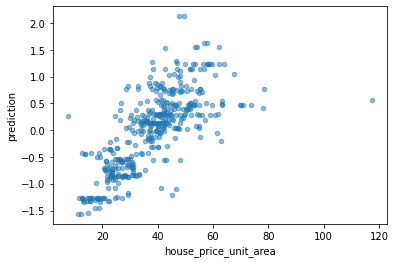

In [ ]:
rles.plot("house_price_unit_area", "prediction", kind = "scatter", alpha = 0.5)

This figure shows the plot of the actual values of the house_price_unit_area, and the predicted values of house_price_unit_area using the diatance of the nearest MRT station has the only feature.

This plot shows clustering around a certain area, so it is not the best option to predict future values. 

## Task 2: multiple linear regression (all variables)

create a multiple regression model that utilizes all features to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient for each variable.

---

Make sure all your features and target columns are standardized, and that you are using all the features in the data frame (also make sure to use ```log10(distance_nearest_MRT_station)``` rather than ```distance_nearest_MRT_station``` as a feature)

In [ ]:
# -- your code here
features = rles[["transaction_date", "house_age", "log10_distance_nearest_MRT_station", "convenience_stores"]]
target = rles["house_price_unit_area"]

features_s = (features - features.mean())/features.std()
target_s = (target - target.mean())/target.std()

Using the code library of your choice, fit a multiple linear regression model to the data

In [ ]:
# -- your code here
mlr_s = LinearRegression()
mlr_s.fit(features_s, target_s)

LinearRegression()

Print the coefficients of each of the features

In [ ]:
mlr_s.coef_

array([ 0.152125  , -0.17676128, -0.64307016,  0.13747018])

In [ ]:
# -- your code here
print("coefficient for transaction_date = {0:.3f}".format(mlr_s.coef_[0]))
print("coefficient for house_age = {0:.3f}".format(mlr_s.coef_[1]))
print("coefficient for log10_distance_nearest_MRT_station = {0:.3f}".format(mlr_s.coef_[2]))
print("coefficient for convenience_stores = {0:.3f}".format(mlr_s.coef_[3]))

What can you claim about the relative correlation and influence of each feature on the prediction of the target variable?


1.   transaction_date has the third highest coefficient value, thus it has the third strongest influence on the target. As transaction_date increases,   house price also increases.  

---


2.   house_age has the second highest coefficient value, thus it has the second strongest influence on the target. As house_age increases, house price decreases.  

---


3. log10_distance_nearest_MRT_station has the largest coefficient value, thus it has the highest influence on the target. As log10_distance_nearest_MRT_station increases,  house price decreases.  

---


4. convenience_stores has the least highest coefficient, thus it has the least influence on the target. As convenience_stores increases, house price also increases. 

Print the $R^2$ of this model

In [ ]:
# -- your code here
mlr_s.score(features_s, target_s)
print("r^2 of this model = {0:.3f}".format(mlr_s.score(features_s, target_s)))

r^2 of this model = 0.601


Looking only at the $R^2$ scores for this model relative to the previous model in Task 1, would you say the model has improved with the addition of the remaining features or not? and Why?

The model has improved with the addition of the remaining features. The r^2 of this model is higher, showing a higher correlation between the actual values and the predicted values. 

Print the Adjusted-$R^2$ of this model

In [ ]:
# -- your code here
adjr2 = 1 - ( 1-mlr_s.score(features_s, target_s) ) * ( len(target_s) - 1 ) / ( len(target_s) - features_s.shape[1] - 1 )
print("adjusted r2 of this model = {0:.3f}".format(adjr2))

adjusted r2 of this model = 0.597


Looking at both $R^2$ and Ajusted-$R^2$ scores for this model relative to the previous model in Task 1, would you say the model has improved with the addition of the remaining features or not? and Why?

The model has improved with the addition of the rmaining features because the r^2 is higher, and the adjusted r^2 is higher, showing that the additional features have created a significant change in the predicted values. 

Plot the actual vs. model predicted values for the house price/unit area for all objects in the data. Is there any visible improvement in the quality of the prediction that you can claim from comparing this plot with the one from Task 2? 

In [ ]:
rles["predictmult"] = mlr_s.predict(features_s)

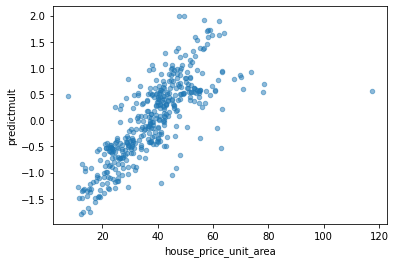

In [ ]:
rles.plot("house_price_unit_area", "predictmult", kind = "scatter", alpha = 0.5);

This figure shows the plot of the actual values of the house_price_unit_area, and the predicted values of house_price_unit_area using "transaction_date", "house_age", "log10_distance_nearest_MRT_station", "convenience_stores" as the features.

---
This plot is more linear and shows a stronger correlation between the actual values and the predicted values. 
